![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

import datetime

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
ret = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding = 'latin1')

In [4]:
# Print out First 5 rows from dataframe
# Your code here
ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Print out brief info
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
ret.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [7]:
# Your code here
ret.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [8]:
# List all NaN values
ret[ret['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


**Drop missing values of Description**

In [0]:
temp = ret[ret['Description'].isnull()].index.values
ret.drop(labels = temp, axis = 0, inplace = True)

In [10]:
ret.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [11]:
ret.shape

(540455, 8)

**Drop missing values of CustomerID**

In [0]:
temp_cus = ret[ret['CustomerID'].isnull()].index.values
ret.drop(labels = temp_cus, axis = 0, inplace = True)

In [13]:
ret.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Exclude negative Quatity entries**

In [14]:
ret.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
ret[ret['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


In [0]:
ret = ret[ret['Quantity'] > 0]

In [17]:
ret[ret['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [18]:
ret[ret['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
ret.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

Add new column "amount_spent"

In [0]:
ret_new = ret
ret_new['amount_spent'] = ret['Quantity'] * ret['UnitPrice']

In [21]:
# Your code here
orders = ret_new.groupby(by = ['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()
orders[orders['Country'] == 'United Kingdom'].sort_values(by = 'InvoiceNo', ascending = False).head(1)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847


**The customer with the highest money spent on purchases comes from Netherlands**

In [22]:
# Your code here
ret_new[ret_new['Country'] == 'Netherlands'].sort_values(by = 'amount_spent', ascending = False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/11 12:11,2.08,14646.0,Netherlands,4992.0


**On which year had the highest sales?**

Extract day, month, year from InvoiceDate

In [28]:
# Your code here
ret_new['Year'] = pd.DatetimeIndex(ret_new['InvoiceDate']).year
ret_new['Month'] = pd.DatetimeIndex(ret_new['InvoiceDate']).month
ret_new['Day'] = pd.DatetimeIndex(ret_new['InvoiceDate']).day
ret_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [31]:
ret_new.groupby(by = ['Year'], as_index=False)['amount_spent'].count().max()

Year              2011
amount_spent    371764
dtype: int64

**How many orders (per hour)?**

Extract hour from InvoiceDate

In [36]:
ret_new['Hour'] = pd.DatetimeIndex(ret_new['InvoiceDate']).hour
ret_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom,15.30,2010,12,1,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom,25.50,2010,12,1,8
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10,2010,12,1,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10,2010,12,1,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08,2010,12,1,8


In [42]:
orders_per_hour = ret_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()
orders_per_hour

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

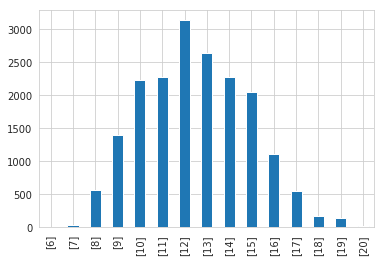

In [52]:
orders_per_hour.plot('bar')

**How many orders (per month)?**

In [53]:
orders_per_month = ret_new.groupby('InvoiceNo')['Month'].unique().value_counts().iloc[:-1].sort_index()
orders_per_month

[2]      998
[3]     1321
[4]     1149
[5]     1555
[6]     1393
[7]     1331
[8]     1281
[9]     1756
[10]    1929
[11]    2658
[12]    2178
Name: Month, dtype: int64

**Make a plot about number of orders per month**

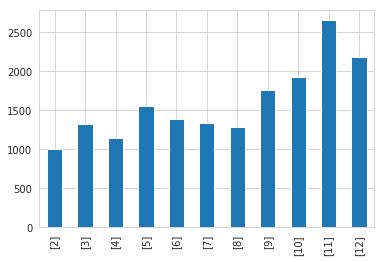

In [54]:
orders_per_month.plot('bar')

**Top 10 items most sales**

In [56]:
ret_new.groupby(by = ['Description'], as_index=False)['Quantity'].count().sort_values(by = ['Quantity'], ascending = False).head(10)

,Description,Quantity
3698,WHITE HANGING HEART T-LIGHT HOLDER,2028
2767,REGENCY CAKESTAND 3 TIER,1724
1762,JUMBO BAG RED RETROSPOT,1618
216,ASSORTED COLOUR BIRD ORNAMENT,1408
2345,PARTY BUNTING,1397
1943,LUNCH BAG RED RETROSPOT,1316
3001,SET OF 3 CAKE TINS PANTRY DESIGN,1159
1935,LUNCH BAG BLACK SKULL.,1105
2611,POSTAGE,1099
2269,PACK OF 72 RETROSPOT CAKE CASES,1068


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [73]:
# Your code here

# What can you tell about this?
ret_top_10 = ret_new[ret_new['Country'] != 'United Kingdom'].groupby(by = 'Country', as_index = False)['Quantity'].count().sort_values(by = ['Quantity'], ascending = False).head(10)
ret_top_10

,Country,Quantity
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485
23,Netherlands,2363
3,Belgium,2031
32,Switzerland,1842
26,Portugal,1462
0,Australia,1185
24,Norway,1072


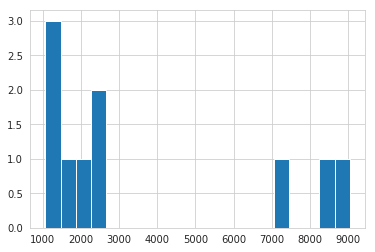

In [80]:
plt.hist(ret_top_10['Quantity'], bins = 20)
plt.show()

### You are awesome!!